# 붓꽃데이터를 이용한 비지도학습 모델별 비교

#### 참조사이트 
* [아무튼 워라벨](http://hleecaster.com/python-matplotlib-bar-graph/)
* [맷플롯라이브](https://matplotlib.org/gallery/statistics/histogram_features.html)
* [시본시각화](https://seaborn.pydata.org/index.html)

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

## 데이터 로드 

In [2]:
iris = load_iris()

In [3]:
print("붓꽃의 키 : ", iris.keys())
print("\n붓꽃의 클래스:", iris.target_names)
print("\n붓꽃의 타겟 :", iris.target)
print("\n붓꽃의 특성 : ", iris.feature_names)

붓꽃의 키 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

붓꽃의 클래스: ['setosa' 'versicolor' 'virginica']

붓꽃의 타겟 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

붓꽃의 특성 :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 1.SVC모델
### 데이터셋 분리 / 학습/ 정확도 측정

In [4]:
from sklearn.svm import SVC
import mglearn
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size = 0.2, random_state = 0)


svm = SVC(C = 100)

svm.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도: 0.98
테스트 세트 정확도: 1.00


### 전처리
#### MinMaxScaler

In [5]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df.columns = ['꽃받침길이','꽃받침너비','꽃잎길이','꽃잎너비']

In [6]:
iris_df.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
print("붓꽃 특성들의 평균값 : ", iris_df.mean())
print("붓꽃 특성들의 분산 : ", iris_df.var())

붓꽃 특성들의 평균값 :  꽃받침길이    5.843333
꽃받침너비    3.057333
꽃잎길이     3.758000
꽃잎너비     1.199333
dtype: float64
붓꽃 특성들의 분산 :  꽃받침길이    0.685694
꽃받침너비    0.189979
꽃잎길이     3.116278
꽃잎너비     0.581006
dtype: float64


In [8]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# 한번에 스케일
mms.fit(iris_df)
iris_scaled = mms.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris_df.columns)

print("특성들의 최소값")
print(iris_df_scaled.min())

print("\n특성들의 최대값")
print(iris_df_scaled.max())

특성들의 최소값
꽃받침길이    0.0
꽃받침너비    0.0
꽃잎길이     0.0
꽃잎너비     0.0
dtype: float64

특성들의 최대값
꽃받침길이    1.0
꽃받침너비    1.0
꽃잎길이     1.0
꽃잎너비     1.0
dtype: float64


#### 최대/최소값 스케일링 후 SVC모델 적용

In [9]:
iris_df_scaled

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target,test_size = 0.2, random_state = 0)
svm = SVC(C = 100)

svm.fit(X_train, y_train)
print("MinMaxScaler 조정 후 훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("MinMaxScaler 조정 후 테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

MinMaxScaler 조정 후 훈련 세트 정확도: 0.97
MinMaxScaler 조정 후 테스트 세트 정확도: 1.00


#### StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler()

# 한번에 스케일
std_scaler.fit(iris_df)
iris_scaled = std_scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris_df.columns)

print("특성들의 최소값")
print(iris_df_scaled.min())

print("\n특성들의 최대값")
print(iris_df_scaled.max())

특성들의 최소값
꽃받침길이   -1.870024
꽃받침너비   -2.433947
꽃잎길이    -1.567576
꽃잎너비    -1.447076
dtype: float64

특성들의 최대값
꽃받침길이    2.492019
꽃받침너비    3.090775
꽃잎길이     1.785832
꽃잎너비     1.712096
dtype: float64


#### 스케일링 후 SVC모델 적용

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target,test_size = 0.2, random_state = 0)
svm = SVC(C = 100)

svm.fit(X_train, y_train)
print("StandardScaler 조정 후 훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("StandardScaler 조정 후 테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

StandardScaler 조정 후 훈련 세트 정확도: 0.98
StandardScaler 조정 후 테스트 세트 정확도: 1.00


## 2. 주성분 분석(PCA)

### 붓꽃 품종별 특성분포 시각화

In [13]:
iris_df['품종'] = iris.target
iris_df.head(3)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### 꽃잎길이와 꽃잎 너비의 규칙

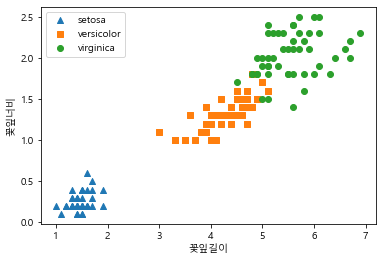

In [14]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

# setosa - 0, versicolor - 1, virginica - 2
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['품종'] == i]['꽃잎길이']
    y_axis_data = iris_df[iris_df['품종'] == i]['꽃잎너비']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel("꽃잎길이")
plt.ylabel("꽃잎너비")
plt.show()

### 세토사 품종의 경우는 꽃잎너비가 3.0보다 크고 , 꽃잎높이가 6이하인 곳에 분포를 이룸(특성 2개)
### versicolor와 virginica는 꽃잎너비와 꽃잎높이로는 분류가 어려움

#### 꽃받침길이와 꽃받침 너비의 관계

In [15]:
iris_df.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris_df.describe()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
iris_df.iloc[0:10,:2]

,꽃받침길이,꽃받침너비
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


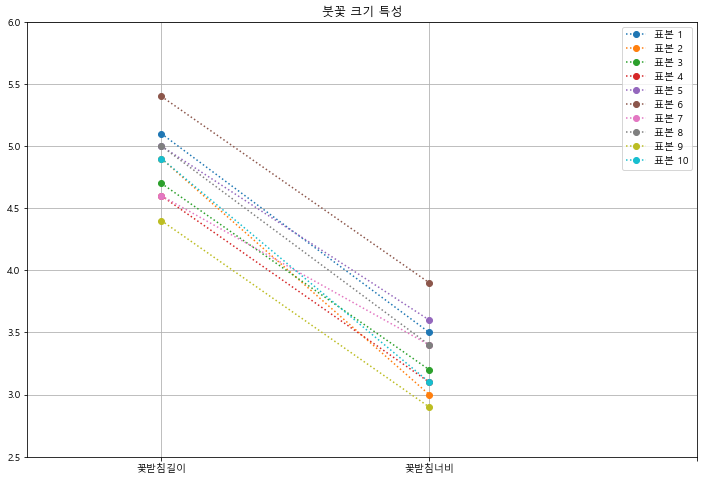

In [18]:
sample = 10
plt.figure(figsize = (12, 8))
X = iris.data[:sample, :2] # X = iris_df.loc[:,["꽃받침높이(cm)", "꽃받침너비(cm)"]]
plt.plot(X.T,'o:')
plt.xticks(ticks = range(4), labels = ["꽃받침길이", "꽃받침너비"])
plt.xlim(-0.5, 2) #X축의 눈금
plt.ylim(2.5, 6)   # Y축의 눈금
plt.title("붓꽃 크기 특성")
plt.legend(['표본 {}'.format(i + 1) for i in range(sample)])
plt.grid(True)
plt.show()

#### 꽃받침길이와 꽃받침 너비의 관계가 보임.(꽃받침길이가 크면 꽃받침 너비가 크다.)

In [19]:
pd.DataFrame(X).iloc[:,0].astype('int').to_numpy()

array([5, 4, 4, 4, 5, 5, 4, 5, 4, 4])

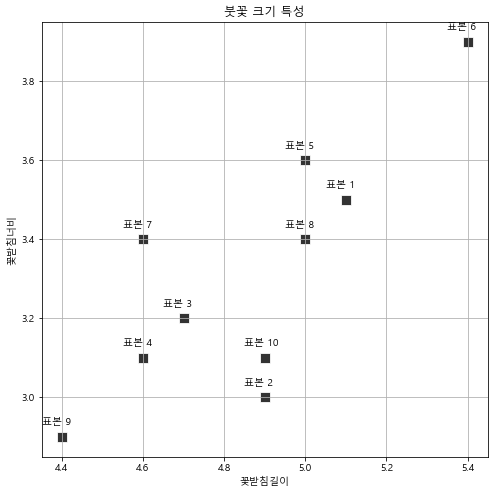

In [21]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(0, 1, data = pd.DataFrame(X), s = 100, color = '.2', marker = 's')
for i in range(sample):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, '표본 {}'.format(i + 1))
plt.xlabel("꽃받침길이")
plt.ylabel("꽃받침너비")
plt.title("붓꽃 크기 특성")
plt.grid(True)
plt.show()

### StandardScaling 및 PCA 
#### 표준 정규분포로 스케일링
#### PCA분석

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 품종은 제외하고 스케일링
iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

pca = PCA(n_components = 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)  # (150, 2)

(150, 2)


In [23]:
iris_pca.shape, iris.target.shape

((150, 2), (150,))

In [24]:
pca_columns = ['붓꽃 첫번째 주성분', '붓꽃 두번째 주성분']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)

irisDF_pca['품종'] = iris.target
irisDF_pca.head(3)

,붓꽃 첫번째 주성분,붓꽃 두번째 주성분,품종
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


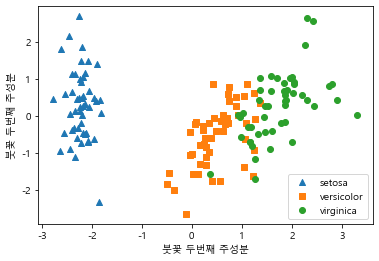

In [64]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

# setosa - 0, versicolor - 1, virginica - 2
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['품종'] == i]['붓꽃 첫번째 주성분']
    y_axis_data = irisDF_pca[irisDF_pca['품종'] == i]['붓꽃 두번째 주성분']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel("붓꽃 두번째 주성분")
plt.ylabel("붓꽃 두번째 주성분")
plt.show()

Text(0, 0.5, '주성분')

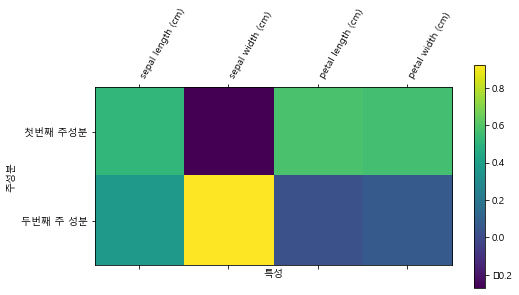

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫번째 주성분", "두번째 주 성분"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
          iris.feature_names, rotation = 60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

## K-평균 군집

In [27]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns = ['꽃받침길이','꽃받침너비','꽃잎길이','꽃잎너비'])
irisDF.head(3)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [29]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for

In [30]:
print("labels_ 속성값 및 형태: ", kmeans.labels_, kmeans.labels_.shape)
print("\n cluster_centers_ : ", kmeans.cluster_centers_)

labels_ 속성값 및 형태:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2] (150,)

 cluster_centers_ :  [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [31]:
irisDF['품종'] = iris.target
irisDF['군집'] = kmeans.labels_

In [32]:
irisDF.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종,군집
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [33]:
iris_clst_rslt = irisDF.groupby(['품종', '군집'])['꽃받침길이'].count()

In [34]:
pd.DataFrame(iris_clst_rslt)

꽃받침길이
품종 군집       
0  1      50
1  0       2
   2      48
2  0      36
   2      14

#### 품종 - 0(setosa)는 1번 군집으로 50개 
#### 품종 - 1(versicolor)는 0번 군집으로 48개,2번 군집으로 2개
#### 품종 - 2(virginica)는 0번 군집 36개, 2번 군집 - 14개

## 붓꽃 군집 데이터 시각화

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(iris.data)
pca_tansformed = pca.transform(iris.data)

In [36]:
pca_tansformed.shape, type(pca_tansformed)

((150, 2), numpy.ndarray)

In [37]:
irisDF['주성분_X'] = pca_tansformed[:,0]
irisDF['주성분_Y'] = pca_tansformed[:,1]

In [38]:
irisDF.head(n = 3)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종,군집,주성분_X,주성분_Y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


### seaborn을 이용한 시각화

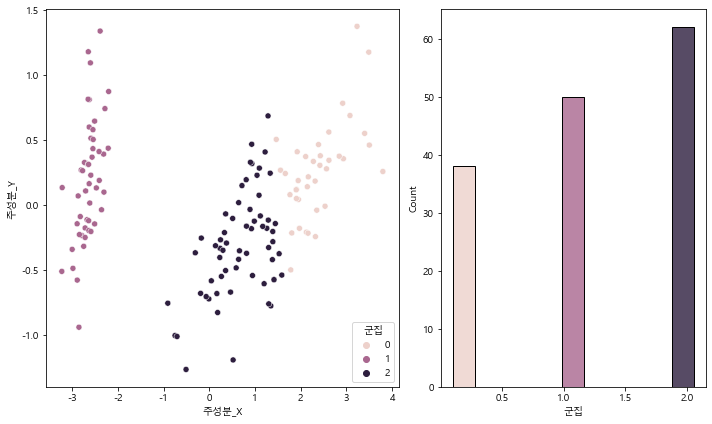

In [63]:
f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=irisDF, x="주성분_X", y="주성분_Y", hue="군집", ax=axs[0])
sns.histplot(data=irisDF, x="군집", hue="군집", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### seaborn의 0.11.1버전
* 산점도와 히스토그램을 같이 보여주는 기능이 있음.
* 0.10.1 버전은 기능이 없음.
* seaborn업그레이드 : <br>
   pip install -U seaborn

### matplotlib 을 이용한 시각화

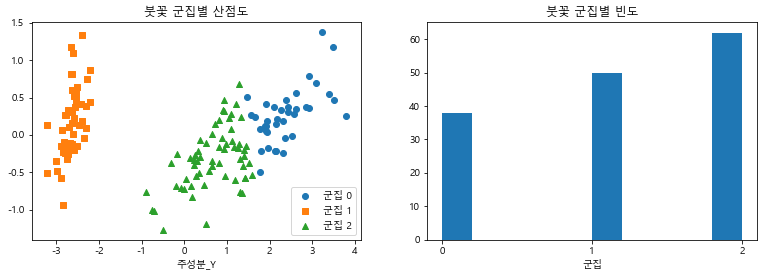

In [74]:
fig, axes = plt.subplots(1,2, figsize = (13, 4))

# 군집값 0 - 'o', 군집값 1 -  's', 군집값 2 - '^' 
markers = ['o', 's', '^']
l_suffix = '군집'
# setosa - 0, versicolor - 1, virginica - 2
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['군집'] == i]['주성분_X']
    y_axis_data = irisDF[irisDF['군집'] == i]['주성분_Y']
    
    axes[0].scatter(x_axis_data, y_axis_data, marker = marker, label = "{} {}".format(l_suffix, i))
    
axes[0].legend()
axes[0].set_xlabel("주성분_X")
axes[0].set_xlabel("주성분_Y")
axes[0].set_title("붓꽃 군집별 특성 산점도")


axes[1].hist(x = '군집', data = irisDF, label = '군집')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xlabel('군집')
axes[1].set_title("붓꽃 군집별 빈도")
plt.show()

#### 군집1 은 상당히 잘 군집이 이루어져있지만 , 군집 0과 군집2는 특성이 명확하게 구별할 수 없는 포인트가 존재함을 알수있다.